In [1]:
import os
os.chdir('/home/vitor/Documentos/projetos/Graduação/Semestre/8/Redes_Complexas');

In [2]:
from numpy  import *
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import networkx as nx

In [5]:
# Reading the Lemis network that has 3 columns, the last one beying the wheights
G= nx.read_edgelist("data/lesmis.txt", nodetype=int, data=(('weight',float),))

In [11]:
# Getting the network number of nodes and edges
N = len(G)
M = G.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)

Number of nodes: 77
Number of edges: 254


/home/vitor/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


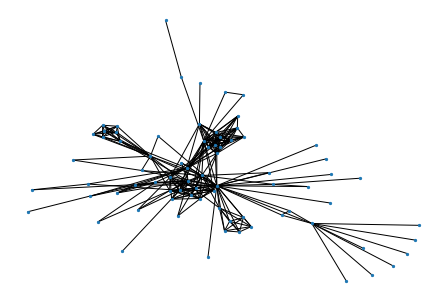

In [6]:
# Drawing the network
nx.draw(G, with_labels = False, node_size=5)
plt.show(True)

In [7]:
# Transforming the network to undirected is redundant, because 'read_edeslist' already returns an undirected graph
G = G.to_undirected()
G.remove_edges_from(G.selfloop_edges())

In [8]:
# Extracting the largest component for distance calculation
Gcc=sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)
G=Gcc[0]

In [9]:
# Converting labels to integers starting with 0
G = nx.convert_node_labels_to_integers(G, first_label=0)

In [10]:
# Getting the network number of nodes and edges
N = len(G)
M = G.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)

Number of nodes: 77
Number of edges: 254


In [12]:
# Degree Measures
vk = dict(G.degree()) # Getting node degrees
vk = list(vk.values()) # Coverting dict to list for only using the degree, with no labels
vk = np.array(vk) # Converting list to array that are easier to manipulate
print('Degree', vk)

Degree [ 1 10  3  3  1  1  1  1  1  1 36  1  2  1  1  1 15 11 16 11 17  4  8  4
  1  2  6  6  6  6  6  3  2 22  7  7 19 15 13 10 10 10  9  3  7  9  7  7
  7  7  7  2 11  3  2  3  1  7  4  1  2 11 13  2  1 11  9 11 12 12 10  2
  2  7  2  1  1]


In [13]:
# Getting the mean degree from the network
md = mean(vk)
print('Mean degree: ', md)

Mean degree:  6.597402597402597


In [16]:
# Getting the degree distribution
def degree_distribution(G):
    vk = dict(G.degree())
    vk = list(vk.values())  # we get only the degree values
    vk = np.array(vk)
    maxk = np.max(vk)
    mink = np.min(vk)
    kvalues= arange(0,maxk+1) # possible values of k
    Pk = np.zeros(maxk+1) # P(k)
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) # the sum of the elements of P(k) must to be equal to one
    return kvalues,Pk

In [17]:
# Getting the degree distribution
ks, Pk = degree_distribution(G)

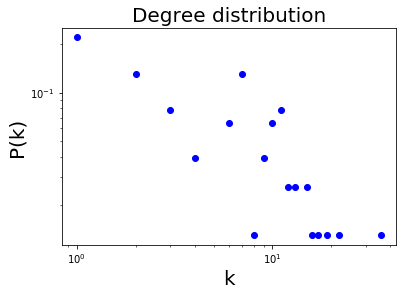

In [20]:
# ploting distribution in log-log scale
fig = plt.subplot(1,1,1)
fig.set_xscale('log')
fig.set_yscale('log')
plt.plot(ks,Pk,'bo')
plt.xlabel("k", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.title("Degree distribution", fontsize=20)
#plt.grid(True)
plt.savefig('degree_dist.eps') #save the figure into a file
plt.show(True)

In [21]:
# Calculating the statical moments
def momment_of_degree_distribution(G,m):
    k,Pk = degree_distribution(G)
    M = sum((k**m)*Pk)
    return M

In [23]:
# First momment
k1 = momment_of_degree_distribution(G,1)
print("Mean degree = ", mean(vk))
print("First moment of the degree distribution = ", k1)

Mean degree =  6.597402597402597
First moment of the degree distribution =  6.5974025974025965


In [25]:
# Secondo momment
k2 = momment_of_degree_distribution(G,2)
print("Second moment of the degree distribution = ", k2)

Second moment of the degree distribution =  79.53246753246754


In [27]:
# Variance
variance = momment_of_degree_distribution(G,2) - momment_of_degree_distribution(G,1)**2
print("Variance of the degree = ", variance)

Variance of the degree =  36.00674650025301


In [28]:
# Network hetorogenity with respect to number of connections
def shannon_entropy(G):
    k,Pk = degree_distribution(G)
    H = 0
    for p in Pk:
        if(p > 0):
            H = H - p*math.log(p, 2)
    return H

In [29]:
H = shannon_entropy(G)
print("Shannon Entropy = ", "%3.4f"%H)

Shannon Entropy =  3.5957


In [30]:
# Normalized version
def normalized_shannon_entropy(G):
    k,Pk = degree_distribution(G)
    H = 0
    for p in Pk:
        if(p > 0):
            H = H - p*math.log(p, 2)
    return H/math.log(len(G),2)

In [31]:
H = normalized_shannon_entropy(G)
print("Normalized Shannon Entropy = ", "%3.4f"%H)

Normalized Shannon Entropy =  0.5738
